In [1]:
import numpy as np
import matplotlib.pyplot as plot

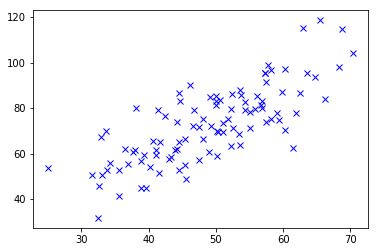

In [2]:
data = np.genfromtxt("../l1_data.csv", delimiter=",")
plot.plot(data[:, 0], data[:, 1], 'bx')
plot.show()

In [3]:
def split_data(data):
    _, features = data.shape
    return (data[:, :-1], data[:, -1:])

independent, dependent = split_data(data)

In [4]:
def hypothesis(theta, indep_row):
    return int(np.dot(theta.T, indep_row))

def prediction_fault(theta, indep_row, dep_row):
    return hypothesis(theta, indep_row) - int(dep_row)
    
def cost(theta, indep, dep, n):
    acc_square_diff = 0
    for i in range(n):
        acc_square_diff += prediction_fault(theta, indep[i, :], dep[i, :])**2
    return (1 / (2 * n)) * acc_square_diff
    
def grad_desc(theta, indep, dep, n, lr):
    acc_dot = 0
    for i in range(n):
        diff = prediction_fault(theta, indep[i, :], dep[i, :])
        acc_dot += np.dot(diff, indep[i, :])
    return theta - lr * (1/n) * acc_dot

In [5]:
def theta_costs(indep, dep, lr=0.0001, iter=15):
    n, features = indep.shape
    theta = np.zeros(features + 1)
    bias_indep = np.column_stack((np.ones(n), indep))
    costs = []
    for i in range(iter):
        costs.append(cost(theta, bias_indep, dep, n))
        theta = grad_desc(theta, bias_indep, dep, n, lr)
    return theta, costs

In [6]:
theta, costs = theta_costs(independent, dependent)

In [7]:
def plot_data(data, predicted, costs):
    x, y = data
    fig, (g1, g2) = plot.subplots(nrows=2, ncols=1)
    g1.plot(x, y, 'bo', markersize=2)
    g1.plot(x, predicted, 'ro', markersize=2)
    g1.axis([x.min() - x.mean() / 10, x.max() + x.mean()/ 10, y.min() - y.mean()/ 10, y.max() + y.mean()/ 10])
    g2.plot(costs)
    plot.show()

def predict(theta, indep):
    n, features = indep.shape
    bias_indep = np.column_stack((np.ones(n), indep))
    return np.sum(np.transpose(theta) * bias_indep, axis=1)

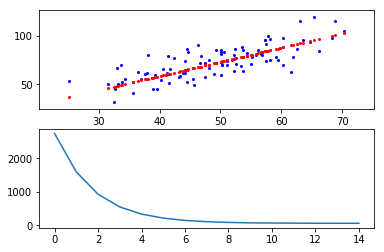

In [8]:
plot_data((independent, dependent), predict(theta, independent), costs)

In [33]:
class LinReg:
    def __init__(self, data):
        self.data = data
        self.independent, self.dependent = data[:, :-1], data[:, -1:]
        self.n, self.features = self.independent.shape
        self.bias_indep = np.column_stack((np.ones(self.n), self.independent))
    
    @staticmethod
    def hypothesis(theta, indep_row):
        return int(np.dot(theta.T, indep_row))

    @staticmethod
    def prediction_fault(theta, indep_row, dep_row):
        return LinReg.hypothesis(theta, indep_row) - int(dep_row)

    def cost(self, theta):
        acc_square_diff = 0
        for i in range(self.n):
            acc_square_diff += LinReg.prediction_fault(theta, self.bias_indep[i, :], self.dependent[i, :])**2
        return (1 / (2 * self.n)) * acc_square_diff

    def grad_desc(self, theta, lr):
        acc_dot = 0
        for i in range(self.n):
            diff = LinReg.prediction_fault(theta, self.bias_indep[i, :], self.dependent[i, :])
            acc_dot += np.dot(diff, self.bias_indep[i, :])
        return theta - lr * (1/self.n) * acc_dot
    
    def theta_costs(self, lr=0.0001, iter=15):
        costs = []
        theta = np.zeros(self.features + 1)
        for i in range(iter):
            costs.append(self.cost(theta))
            theta = self.grad_desc(theta, lr)
        return theta, costs
    
    def plot_data(self, theta, costs):
        predicted = self.predict(theta)
        x, y = (self.independent, self.dependent)
        fig, (g1, g2) = plot.subplots(nrows=2, ncols=1)
        g1.plot(x, y, 'bo', markersize=2)
        g1.plot(x, predicted, 'ro', markersize=2)
        g1.axis([x.min() - x.mean() / 10, x.max() + x.mean()/ 10, y.min() - y.mean()/ 10, y.max() + y.mean()/ 10])
        g2.plot(costs)
        plot.show()

    def predict(self, theta):
        return np.sum(np.transpose(theta) * self.bias_indep, axis=1)

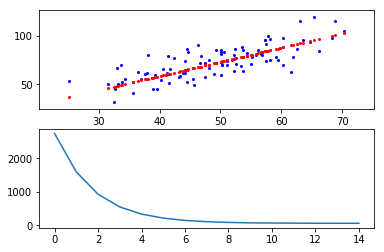

In [34]:
r = LinReg(data)
theta, costs = r.theta_costs()
r.plot_data(theta, costs)